In [ ]:
# Snowflake Analytics

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.style as style

In [ ]:
style.use('fivethirtyeight')

In [ ]:


df_compute = _deepnote_execute_sql("""SELECT
  date_trunc('month', usage_date) as dt,
  usage_type,
  SUM(usage_in_currency) as total_cost
from SNOWFLAKE.ORGANIZATION_USAGE.USAGE_IN_CURRENCY_DAILY
group by 1,2
""", 'SQL_93225A54_FC17_42EA_996A_2FC8D9FA55B3')
df_compute

,dt,usage_type,total_cost
0,2021-11-01,overage-storage,0.624802
1,2022-01-01,overage-adj for incl cloud services,-112.254501
2,2022-06-01,overage-storage,13.551858
3,2022-07-01,overage-compute,2704.894166
4,2021-11-01,overage-cloud services,37.691958
5,2021-11-01,overage-snowpipe,0.260718
6,2022-01-01,overage-compute,1122.545001
7,2022-02-01,overage-storage,4.066642
8,2022-02-01,overage-snowpipe,1.089831
9,2022-03-01,overage-adj for incl cloud services,-147.970252


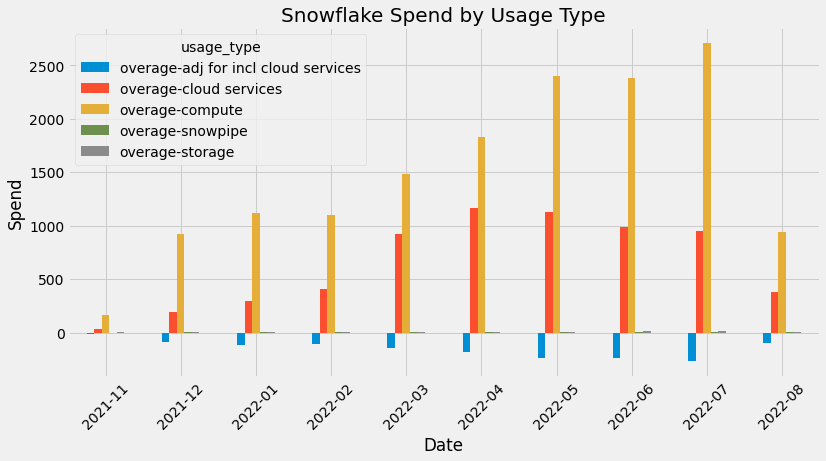

In [ ]:
pvt = df_compute.pivot(index='dt', columns='usage_type',  values='total_cost')
chart = pvt.plot(kind='bar', figsize=(12,6), xlabel="Date", ylabel="Spend")
_ = chart.set_title("Snowflake Spend by Usage Type", fontsize=20)
_ = chart.set_xticklabels([x.strftime("%Y-%m") for x in pvt.index], rotation=45)

In [ ]:


df_warehouses = _deepnote_execute_sql("""SELECT
    date_trunc('month', start_time) as dt,
    warehouse_name,
    SUM(credits_used_compute) AS credits_used_compute,
    SUM(credits_used_cloud_services) AS credits_used_cloud_services
FROM SNOWFLAKE.ORGANIZATION_USAGE.warehouse_metering_history
GROUP BY 1,2
""", 'SQL_93225A54_FC17_42EA_996A_2FC8D9FA55B3')
df_warehouses

,dt,warehouse_name,credits_used_compute,credits_used_cloud_services
0,2022-08-01 00:00:00+00:00,DBT_PROD,75.339167,21.959389
1,2022-08-01 00:00:00+00:00,EXTERNAL_INGEST,112.650278,38.603152
2,2022-07-01 00:00:00+00:00,DBT_PROD,159.665556,45.921774
3,2022-06-01 00:00:00+00:00,DBT_LEGACY_PROD,90.475000,37.979092
4,2022-04-01 00:00:00+00:00,DBT_LEGACY_DEV,5.308611,0.882991
...,...,...,...,...
94,2022-01-01 00:00:00+00:00,EXTERNAL_INGEST,245.598611,51.753818
95,2021-12-01 00:00:00+00:00,DBT_LEGACY,0.025833,0.000000
96,2021-10-01 00:00:00+00:00,BI_REPORTING,0.026111,0.000021
97,2021-10-01 00:00:00+00:00,DBT_PROD,0.094167,0.001507


/tmp/ipykernel_149/3145628678.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = warehouse_chart.set_xticklabels([x.strftime("%Y-%m") for x in warehouse_pvt.index], rotation=45)


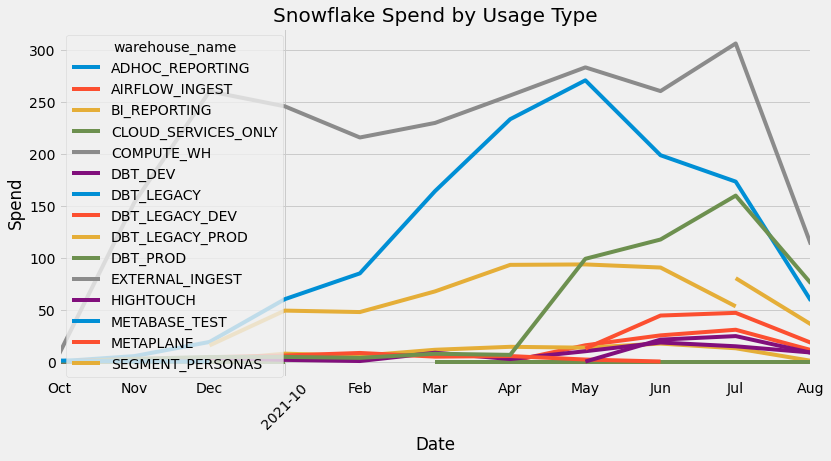

In [ ]:
warehouse_pvt = df_warehouses.pivot(index='dt', columns='warehouse_name',  values='credits_used_compute')
warehouse_chart = warehouse_pvt.plot(kind='line', figsize=(12,6), xlabel="Date", ylabel="Spend")
_ = warehouse_chart.set_title("Snowflake Spend by Usage Type", fontsize=20)
_ = warehouse_chart.set_xticklabels([x.strftime("%Y-%m") for x in warehouse_pvt.index], rotation=45)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4d91a2e1-7025-499c-b669-a94862ea0866' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>